In [1]:
# importing libraries:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import os
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score


In [2]:
# importing dataset:
df = pd.read_csv('diabetic_data.csv')

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Data Preprocessing:

In [4]:
df.shape

(101766, 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [8]:
# checking the null values:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [9]:
# checking dupliactes:
df.duplicated().sum()

0

## Exploratory Data Analysis:

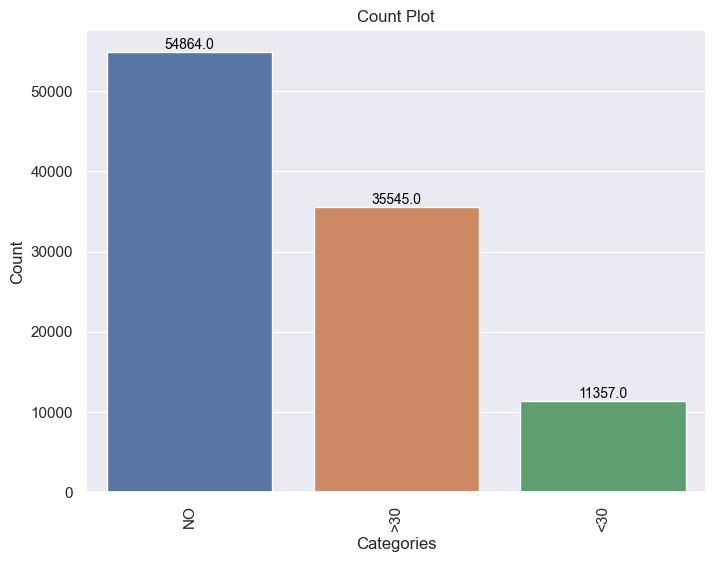

In [10]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.countplot(x='readmitted', data=df)
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.xticks(rotation=90)
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [11]:
labels = ['not admitted','admitted with in 30 days','admitted after 30 days']

## Label Encoding:

In [12]:
le = LabelEncoder()

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column type is object
        df[column] = le.fit_transform(df[column])


In [14]:
# checking whether the conversion is done or not:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   race                      101766 non-null  int32
 3   gender                    101766 non-null  int32
 4   age                       101766 non-null  int32
 5   weight                    101766 non-null  int32
 6   admission_type_id         101766 non-null  int64
 7   discharge_disposition_id  101766 non-null  int64
 8   admission_source_id       101766 non-null  int64
 9   time_in_hospital          101766 non-null  int64
 10  payer_code                101766 non-null  int32
 11  medical_specialty         101766 non-null  int32
 12  num_lab_procedures        101766 non-null  int64
 13  num_procedures            101766 non-null  int64
 14  num_medications     

In [15]:
# x and y variable declaration:

In [16]:
x = df.drop('readmitted',axis=1)

In [17]:
scaler=StandardScaler()

In [18]:
x = scaler.fit_transform(x)

In [19]:
x

array([[-1.58733032, -1.19154543,  0.42755739, ..., -0.00313473,
         0.92659052, -1.82986799],
       [-1.60807473,  0.03356374,  0.42755739, ..., -0.00313473,
        -1.07922537,  0.54648751],
       [-1.60890073,  0.81965411, -1.70370587, ..., -0.00313473,
         0.92659052,  0.54648751],
       ...,
       [ 2.71485842, -0.34219438,  0.42755739, ..., -0.00313473,
        -1.07922537,  0.54648751],
       [ 2.71488782, -0.58498632,  0.42755739, ..., -0.00313473,
        -1.07922537,  0.54648751],
       [ 2.71498579,  3.12948056,  0.42755739, ..., -0.00313473,
         0.92659052, -1.82986799]])

In [20]:
y = df.iloc[:,-1]

In [21]:
y

0         2
1         1
2         2
3         2
4         2
         ..
101761    1
101762    2
101763    2
101764    2
101765    2
Name: readmitted, Length: 101766, dtype: int32

## Applying Smote:

In [22]:
smote = SMOTE(sampling_strategy='auto',random_state=42)

In [23]:
x,y= smote.fit_resample(x,y)

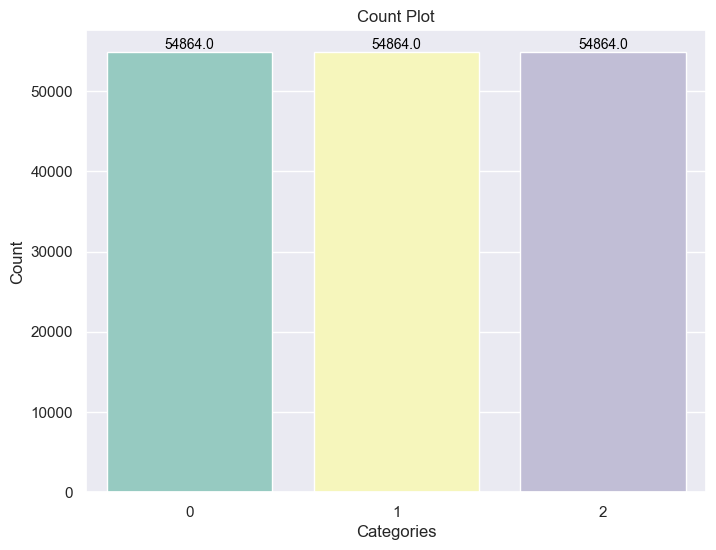

In [24]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x=y, data=df, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [25]:
# train,test and splitting of data: 

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=77)

In [27]:
x_train.shape

(131673, 49)

In [28]:
x_test.shape

(32919, 49)

In [29]:
y_train.shape

(131673,)

In [30]:
y_test.shape

(32919,)

In [31]:
# building an ML model:

In [32]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [33]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

model loaded successfully
RFC Accuracy    : 70.81017041829946
RFC Precision   : 70.7479638768691
RFC Recall      : 70.55947598950706
RFC FSCORE      : 70.31875865857336

 RFC classification report
                           precision    recall  f1-score   support

            not admitted       0.81      0.82      0.82     10945
admitted with in 30 days       0.64      0.52      0.57     10888
  admitted after 30 days       0.67      0.78      0.72     11086

                accuracy                           0.71     32919
               macro avg       0.71      0.71      0.70     32919
            weighted avg       0.71      0.71      0.70     32919



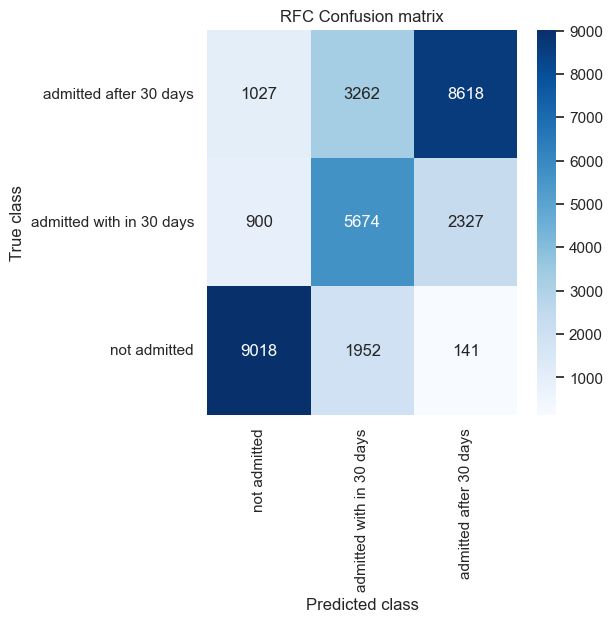

In [34]:
#rfc model:
if os.path.exists('RFC.pkl'):
    #load the model:
    rfc=joblib.load('RFC.pkl')
    print('model loaded successfully')
    predict=rfc.predict(x_test)
    calculateMetrics("RFC",predict,y_test)
else:
    rfc = RandomForestClassifier(n_estimators=100,random_state=42)
    #train the model:
    rfc.fit(x_train,y_train)
    #saving model:
    joblib.dump(rfc,'RFC.pkl')
    print('model saved successfully')
    predict=rfc.predict(x_test)
    calculateMetrics("RFC",predict,y_test)

Model loaded successfully.
ExtraTreesClassifier Accuracy    : 79.65005012302926
ExtraTreesClassifier Precision   : 79.64215767853338
ExtraTreesClassifier Recall      : 79.6226334791616
ExtraTreesClassifier FSCORE      : 79.58478362800251

 ExtraTreesClassifier classification report
                           precision    recall  f1-score   support

            not admitted       0.92      0.93      0.93     10945
admitted with in 30 days       0.74      0.69      0.71     10888
  admitted after 30 days       0.73      0.77      0.75     11086

                accuracy                           0.80     32919
               macro avg       0.80      0.80      0.80     32919
            weighted avg       0.80      0.80      0.80     32919



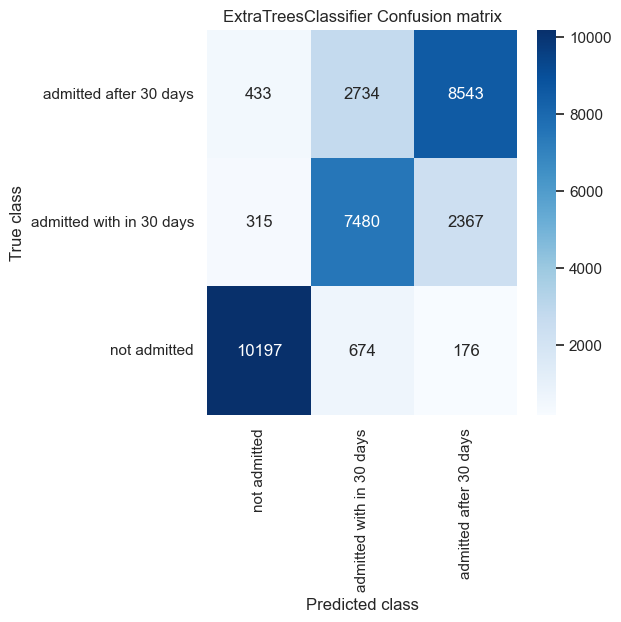

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
if os.path.exists('ExtraTrees_model.pkl'):
    # Load the trained model from the file
    ex = joblib.load('ExtraTrees_model.pkl')
    print("Model loaded successfully.")
    predict = ex.predict(x_test)
    calculateMetrics("ExtraTreesClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    ex = ExtraTreesClassifier()
    ex.fit(x_train, y_train)
    # Save the trained model to a file
    joblib.dump(ex, 'ExtraTrees_model.pkl')
    print("Model saved successfully.")
    predict = ex.predict(x_test)
    calculateMetrics("ExtraTreesClassifier", predict, y_test)
